## 라이브러리 import 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

## 데이터 불러오기

In [2]:
Data = pd.read_csv('./ExampleData', sep=',', header=None)
Data.shape

(2774, 4)

## Time domain 그래프

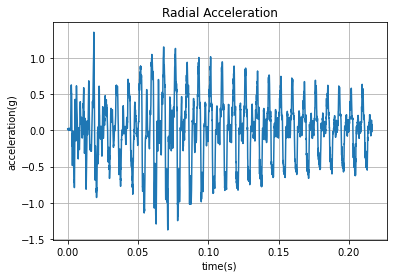

In [3]:
plt.plot(Data.iloc[:,0], Data.iloc[:,1])
plt.grid()
    # Data.iloc[:,0] : 시간열 // Data.iloc[:,1] : 신호열 (반경방향 가속도)
    # 데이터에 따라 맞추어 변경
plt.xlabel('time(s)')
plt.ylabel('acceleration(g)')
plt.title('Radial Acceleration')
#plt.xlim(0,0.2167)
plt.show()

## FFT 실행

시간열 t , 데이터 x 정의

In [4]:
t = Data.iloc[:,0].values # 데이터의 시간열 선택
x = Data.iloc[:,1].values # 데이터의 신호열 선택 (1개 신호만 선택)

Sampling frequency 계산 : Fs = 데이터 개수/시간

In [5]:
Fs = int(len(t)/t[-1])
Fs

12804

In [6]:
# Compute FFT

NFFT   =  len(x)                              # length of signal > NFFT = 2 ^ nextpow2(length(y)) 
k      =  np.arange(NFFT)
f0     =  k * Fs / NFFT                    # Double sides Frequency range
f0     =  f0[range(math.trunc(NFFT/2))]    # Single side  Frequency range

Y      =  np.fft.fft(x)/NFFT             # FFT computing and normalization
Y      =  Y[range(math.trunc(NFFT/2))]   # Single side  Frequency range
amp_Hz =  2 * abs(Y)
phase_ang = np.angle(Y) * 180/np.pi

## FFT 그래프 (Frequency domain)

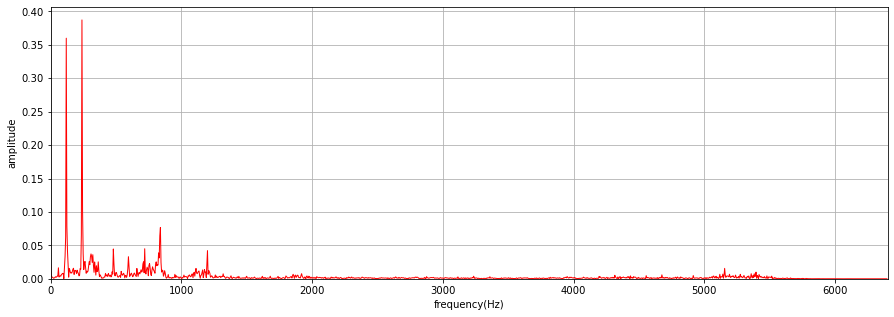

In [7]:
plt.figure(figsize=(15,5))
plt.plot(f0,amp_Hz,'r', lw=1)
plt.xlim(0, Fs/2)
plt.ylim(0)
plt.xlabel('frequency(Hz)')
plt.ylabel('amplitude')
plt.grid()